<a href="https://colab.research.google.com/github/shyakx/Water_Quality_Model/blob/main/formative_II_starter_code_CyizaHenriette_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = "/content/drive/MyDrive/water_potability.csv"
df = pd.read_csv(file_path)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

In [15]:
# Checking for missing values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [16]:
# Filling missing values with column means
df.fillna(df.mean(), inplace=True)

# Verifying no missing values remain
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [17]:
# generate 2d classification dataset
X = df.drop(columns=['Potability'])
Y = df['Potability']

In [18]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
# Split the data into training (70%), validation (15%), and testing (15%) sets.
# Stratify ensures the target distribution is maintained in each split.
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# Print the sizes of each dataset
print("\nDataset sizes:")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")


Dataset sizes:
Training set: (2293, 9), Validation set: (491, 9), Testing set: (492, 9)


# Each Memeber Defines their model Here

In [20]:
#Model Definition by member 1
def model_Henriette(learning_rate=0.001, dropout_rate=0.5):
    """
    Define a neural network model with L1 regularization and dropout.
    Args:
        learning_rate (float): Learning rate for the optimizer.
        dropout_rate (float): Dropout rate to prevent overfitting.
    Returns:
        model: A compiled Keras model.
    """
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with shape matching the number of features
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),  # Hidden layer with L1 regularization
        keras.layers.Dropout(dropout_rate),  # Dropout layer to prevent overfitting
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)),  # Second hidden layer
        keras.layers.Dropout(dropout_rate),  # Another dropout layer
        keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define training parameters
learning_rate = 0.001  # Small learning rate for stable training
dropout_rate = 0.5  # Dropout rate to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Early stopping to avoid overfitting

# Explanation of Optimization Techniques
"""
Learning Rate (0.001): A small learning rate ensures stable training without overshooting the optimal weights.
Dropout Rate (0.5): Randomly drops 50% of neurons during training to prevent overfitting.
Early Stopping (patience=10): Stops training if validation loss does not improve for 10 consecutive epochs.
These choices ensure the model generalizes well without overfitting or underfitting.
"""

'\nLearning Rate (0.001): A small learning rate ensures stable training without overshooting the optimal weights.\nDropout Rate (0.5): Randomly drops 50% of neurons during training to prevent overfitting.\nEarly Stopping (patience=10): Stops training if validation loss does not improve for 10 consecutive epochs.\nThese choices ensure the model generalizes well without overfitting or underfitting.\n'

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process


Training the model...
Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4761 - loss: 3.9035 - val_accuracy: 0.6110 - val_loss: 2.9469
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5768 - loss: 2.6969 - val_accuracy: 0.6110 - val_loss: 1.9859
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6074 - loss: 1.7927 - val_accuracy: 0.6110 - val_loss: 1.2876
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6112 - loss: 1.1748 - val_accuracy: 0.6110 - val_loss: 0.9073
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6087 - loss: 0.8543 - val_accuracy: 0.6110 - val_loss: 0.7375
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6043 - loss: 0.7210 - val_accuracy: 0.6110 - val_loss: 0.6806
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6268 - loss: 0.6706 - val_accuracy: 0.6110 - val_loss: 0.6715
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6138 - loss: 0.6707 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


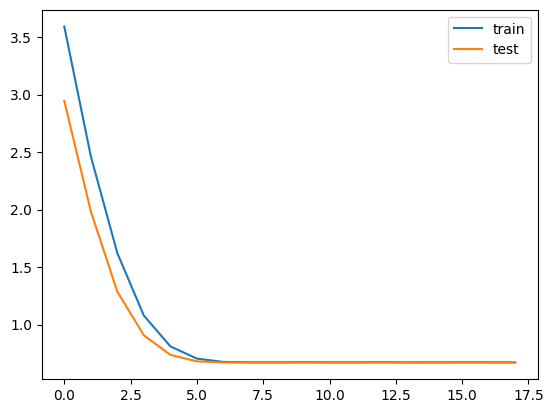

In [21]:
!pip install scikit-learn
from sklearn.metrics import classification_report

model = model_Henriette(learning_rate, dropout_rate)

# Train the model
print("\nTraining the model...")
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
# Import classification_report here
print(classification_report(Y_test, y_pred)) # Now classification_report is defined and accessible.
print("\nClassification Report:")

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()